In [ ]:
%%capture
import math
import random
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install deap
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

In [ ]:
Temperature = [5, 10, 20, 40]
Frecuenzy = [0.5, 1, 2, 4, 8]
lab_results = [
    [17797.9,18891.9,19862.3,21268.6,22219.2],
    [15831.9,15842,17594.4,17977.5,19629.1],
    [9092,9224.7,9420.2,9640.5,11328.8],
    [1415.8,1865.2,2791.3,4604.4,8205.7],
]
n_x, n_y, penalize = len(lab_results), len(lab_results[0]), 10000000

In [ ]:
# CANONICAL_MODEL
def funcion_objetivo(individual):
  MAPE1, MSLE1 = 0, 0
  alpha1, beta1, gamma1, delta1 = individual[0], individual[1], individual[2], individual[3]
  for j in range(0, n_y):
    fr = Frecuenzy[j]
    if alpha1<-11 or alpha1>11 or alpha1==0:
      return penalize, penalize
    if beta1<-11 or beta1>11 or beta1==0:
      return penalize, penalize
    if gamma1<-11 or gamma1>11 or gamma1==0:
      return penalize, penalize
    if delta1<-11 or delta1>11 or delta1==0:
      return penalize, penalize
    right1 = (alpha1+delta1)/(1+pow(math.e, beta1+gamma1*math.log10(fr)))
    if right1>=2 and right1<=5:
      ED1 = 10**right1
      MAPE1 = MAPE1 + abs((lab_results[Temp][j]-ED1)/lab_results[Temp][j])
      MSLE1 = MSLE1 + pow(np.log(1+lab_results[Temp][j])-np.log(1+ED1), 2)
    else:        
      return penalize, penalize
  MAPE1, MSLE1 = MAPE1/n_y, MSLE1/n_y
  if MAPE1>=0.05 or MSLE1>=0.003:
    return penalize, penalize
  else:
    vector_alpha1.append(round(alpha1, 5))
    vector_beta1.append(round(beta1, 5))
    vector_gamma1.append(round(gamma1, 5))
    vector_delta1.append(round(delta1, 5))
    vector_MAPE1.append(round(MAPE1, 5))
    vector_MSLE1.append(round(MSLE1, 5))
    return MAPE1, MSLE1
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_alpha1", random.uniform, 3.5, 5)
toolbox.register("attr_beta1", random.uniform, -2.5, 2)
toolbox.register("attr_gamma1", random.uniform, -1.5, 0)
toolbox.register("attr_delta1", random.uniform, 2, 4)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_alpha1, toolbox.attr_beta1, toolbox.attr_gamma1, toolbox.attr_delta1), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 1600)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.5, sigma=0.25, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("evaluate", funcion_objetivo)
results_CANONICAL = np.zeros((n_x-1, 5))
for i in range(0, n_x-1):
  vector_alpha1, vector_beta1, vector_gamma1, vector_delta1, vector_MAPE1, vector_MSLE1 = [], [], [], [], [], []
  Temp = i
  def main():
    pop = toolbox.population()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()  
    pareto = tools.ParetoFront() 
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=100, stats=stats, halloffame=pareto, verbose=False)
    return pop, logbook, pareto
  main()
  results_CANONICAL[i,0] = int(Temperature[i])
  minimum_error = min(vector_MAPE1)
  min_position = vector_MAPE1.index(minimum_error)
  results_CANONICAL[i,1] = vector_alpha1[min_position]
  results_CANONICAL[i,2] = vector_beta1[min_position]
  results_CANONICAL[i,3] = vector_gamma1[min_position]
  results_CANONICAL[i,4] = vector_delta1[min_position]
print(results_CANONICAL)

[[ 5.       4.45698 -0.20707 -0.04726  3.30069]
 [10.       5.36491  0.09877 -0.04319  3.48466]
 [20.       3.62728 -0.21092 -0.05562  3.54079]]


In [ ]:
# UCR_MODEL
def funcion_objetivo(individual):
  MAPE2, MSLE2 = 0, 0
  alpha2, beta2, gamma2, delta2 = individual[0], individual[1], individual[2], individual[3]
  for j in range(0, n_y):
    fr = Frecuenzy[j]
    if alpha2<-11 or alpha2>11 or alpha2==0:
      return penalize, penalize
    if beta2<-11 or beta2>11 or beta2==0:
      return penalize, penalize
    if gamma2<-11 or gamma2>11 or gamma2==0:
      return penalize, penalize
    if delta2<-11 or delta2>11 or delta2==0:
      return penalize, penalize
    right2 = delta2 + ((alpha2-delta2)/(1+pow(math.e, beta2+gamma2*math.log10(fr))))
    if right2>=2 and right2<=5:
      ED2 = 10**right2
      MAPE2 = MAPE2 + abs((lab_results[Temp][j]-ED2)/lab_results[Temp][j])
      MSLE2 = MSLE2 + pow(np.log(1+lab_results[Temp][j])-np.log(1+ED2), 2)
    else:        
      return penalize, penalize
  MAPE2, MSLE2 = MAPE2/n_y, MSLE2/n_y
  if MAPE2>=0.05 or MSLE2>=0.003:
    return penalize, penalize
  else:
    vector_alpha2.append(round(alpha2, 5))
    vector_beta2.append(round(beta2, 5))
    vector_gamma2.append(round(gamma2, 5))
    vector_delta2.append(round(delta2, 5))
    vector_MAPE2.append(round(MAPE2, 5))
    vector_MSLE2.append(round(MSLE2, 5))
    return MAPE2, MSLE2
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_alpha2", random.uniform, 3.5, 5)
toolbox.register("attr_beta2", random.uniform, -2.5, 2)
toolbox.register("attr_gamma2", random.uniform, -1.5, 0)
toolbox.register("attr_delta2", random.uniform, 2, 4)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_alpha2, toolbox.attr_beta2, toolbox.attr_gamma2, toolbox.attr_delta2), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 1600)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.5, sigma=0.25, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("evaluate", funcion_objetivo)
results_UCR = np.zeros((n_x-1, 5))
for i in range(0, n_x-1):
  vector_alpha2, vector_beta2, vector_gamma2, vector_delta2, vector_MAPE2, vector_MSLE2 = [], [], [], [], [], []
  Temp = i
  def main():
    pop = toolbox.population()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()  
    pareto = tools.ParetoFront() 
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=100, stats=stats, halloffame=pareto, verbose=False)
    return pop, logbook, pareto
  main()
  results_UCR[i,0] = int(Temperature[i])
  minimum_error = min(vector_MAPE2)
  min_position = vector_MAPE2.index(minimum_error)
  results_UCR[i,1] = vector_alpha2[min_position]
  results_UCR[i,2] = vector_beta2[min_position]
  results_UCR[i,3] = vector_gamma2[min_position]
  results_UCR[i,4] = vector_delta2[min_position]
print(results_UCR)

[[ 5.       3.52031  1.12904  0.45584  4.52256]
 [10.       5.29086  2.8272  -1.04306  4.14066]
 [20.       4.63334  2.97112 -1.32189  3.93237]]


In [ ]:
# SLS_MODEL
def funcion_objetivo(individual):
  MAPE3, MSLE3 = 0, 0
  alpha3, beta3, gamma3, delta3 = individual[0], individual[1], individual[2], individual[3]
  for j in range(0, n_y):
    fr = Frecuenzy[j]
    if alpha3<-11 or alpha3>11 or alpha3==0:
      return penalize, penalize
    if beta3<-11 or beta3>11 or beta3==0:
      return penalize, penalize
    if gamma3<-11 or gamma3>11 or gamma3==0:
      return penalize, penalize
    if delta3<-11 or delta3>11 or delta3==0:
      return penalize, penalize
    right3 = delta3 + (alpha3/(1+pow(math.e, beta3-gamma3*math.log10(fr))))
    if right3>=2 and right3<=5:
      ED3 = 10**right3
      MAPE3 = MAPE3 + abs((lab_results[Temp][j]-ED3)/lab_results[Temp][j])
      MSLE3 = MSLE3 + pow(np.log(1+lab_results[Temp][j])-np.log(1+ED3), 2)
    else:        
      return penalize, penalize
  MAPE3, MSLE3 = MAPE3/n_y, MSLE3/n_y
  if MAPE3>=0.05 or MSLE3>=0.003:
    return penalize, penalize
  else:
    vector_alpha3.append(round(alpha3, 5))
    vector_beta3.append(round(beta3, 5))
    vector_gamma3.append(round(gamma3, 5))
    vector_delta3.append(round(delta3, 5))
    vector_MAPE3.append(round(MAPE3, 5))
    vector_MSLE3.append(round(MSLE3, 5))
    return MAPE3, MSLE3
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_alpha3", random.uniform, 3.5, 5)
toolbox.register("attr_beta3", random.uniform, -2.5, 2)
toolbox.register("attr_gamma3", random.uniform, -1.5, 0)
toolbox.register("attr_delta3", random.uniform, 2, 4)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_alpha3, toolbox.attr_beta3, toolbox.attr_gamma3, toolbox.attr_delta3), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 1600)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.5, sigma=0.25, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("evaluate", funcion_objetivo)
results_SLS = np.zeros((n_x-1, 5))
for i in range(0, n_x-1):
  vector_alpha3, vector_beta3, vector_gamma3, vector_delta3, vector_MAPE3, vector_MSLE3 = [], [], [], [], [], []
  Temp = i
  def main():
    pop = toolbox.population()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()  
    pareto = tools.ParetoFront() 
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=100, stats=stats, halloffame=pareto, verbose=False)
    return pop, logbook, pareto
  main()
  results_SLS[i,0] = int(Temperature[i])
  minimum_error = min(vector_MAPE3)
  min_position = vector_MAPE3.index(minimum_error)
  results_SLS[i,1] = vector_alpha3[min_position]
  results_SLS[i,2] = vector_beta3[min_position]
  results_SLS[i,3] = vector_gamma3[min_position]
  results_SLS[i,4] = vector_delta3[min_position]
print(results_SLS)

[[ 5.       7.12303  2.81446  0.22379  3.86914]
 [10.       4.36494  3.10103  0.38501  4.03063]
 [20.       4.93661  4.81142  1.3412   3.91935]]


In [ ]:
# UNIAXIAL_MODEL
def funcion_objetivo(individual):
  MAPE4, MSLE4 = 0, 0
  alpha4, beta4, gamma4, delta4 = individual[0], individual[1], individual[2], individual[3]
  for j in range(0, n_y):
    fr = Frecuenzy[j]
    if alpha4<-11 or alpha4>11 or alpha4==0:
      return penalize, penalize
    if beta4<-11 or beta4>11 or beta4==0:
      return penalize, penalize
    if gamma4<-11 or gamma4>11 or gamma4==0:
      return penalize, penalize
    if delta4<-11 or delta4>11 or delta4==0:
      return penalize, penalize
    right4 = delta4 + ((alpha4-delta4)/(1+pow(math.e, beta4-gamma4*math.log10(fr))))
    if right4>=2 and right4<=5:
      ED4 = 10**right4
      MAPE4 = MAPE4 + abs((lab_results[Temp][j]-ED4)/lab_results[Temp][j])
      MSLE4 = MSLE4 + pow(np.log(1+lab_results[Temp][j])-np.log(1+ED4), 2)
    else:        
      return penalize, penalize
  MAPE4, MSLE4 = MAPE4/n_y, MSLE4/n_y
  if MAPE4>=0.05 or MSLE4>=0.003:
    return penalize, penalize
  else:
    vector_alpha4.append(round(alpha4, 5))
    vector_beta4.append(round(beta4, 5))
    vector_gamma4.append(round(gamma4, 5))
    vector_delta4.append(round(delta4, 5))
    vector_MAPE4.append(round(MAPE4, 5))
    vector_MSLE4.append(round(MSLE4, 5))
    return MAPE4, MSLE4
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_alpha4", random.uniform, 3.5, 5)
toolbox.register("attr_beta4", random.uniform, -2.5, 2)
toolbox.register("attr_gamma4", random.uniform, -1.5, 0)
toolbox.register("attr_delta4", random.uniform, 2, 4)
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_alpha4, toolbox.attr_beta4, toolbox.attr_gamma4, toolbox.attr_delta4), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 1600)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.5, sigma=0.25, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("evaluate", funcion_objetivo)
results_UNIAXIAL = np.zeros((n_x-1, 5))
for i in range(0, n_x-1):
  vector_alpha4, vector_beta4, vector_gamma4, vector_delta4, vector_MAPE4, vector_MSLE4 = [], [], [], [], [], []
  Temp = i
  def main():
    pop = toolbox.population()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()  
    pareto = tools.ParetoFront() 
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=100, stats=stats, halloffame=pareto, verbose=False)
    return pop, logbook, pareto
  main()
  results_UNIAXIAL[i,0] = int(Temperature[i])
  minimum_error = min(vector_MAPE4)
  min_position = vector_MAPE4.index(minimum_error)
  results_UNIAXIAL[i,1] = vector_alpha4[min_position]
  results_UNIAXIAL[i,2] = vector_beta4[min_position]
  results_UNIAXIAL[i,3] = vector_gamma4[min_position]
  results_UNIAXIAL[i,4] = vector_delta4[min_position]
print(results_UNIAXIAL)

[[ 5.       5.59213  0.21393  0.14665  3.21267]
 [10.       5.98079  2.85958  0.66022  4.11181]
 [20.       5.45925  4.6775   2.30942  3.94197]]


In [ ]:
frec = [1E-10, 2E-10, 3E-10, 4E-10, 5E-10, 6E-10, 7E-10, 8E-10, 9E-10, 1E-09, 2E-09, 3E-09, 4E-09, 5E-09, 6E-09, 7E-09, 8E-09, 9E-09, 1E-08, 2E-08, 3E-08, 4E-08, 5E-08, 6E-08, 7E-08, 8E-08, 9E-08, 1E-07, 2E-07, 3E-07, 4E-07, 5E-07, 6E-07, 7E-07, 8E-07, 9E-07, 1E-06, 2E-06, 3E-06, 4E-06, 5E-06, 6E-06, 7E-06, 8E-06, 9E-06, 1E-05, 2E-05, 3E-05, 4E-05, 5E-05, 6E-05, 7E-05, 8E-05, 9E-05, 1E-04, 2E-04, 3E-04, 4E-04, 5E-04, 6E-04, 7E-04, 8E-04, 9E-04, 1E-03, 2E-03, 3E-03, 4E-03, 5E-03, 6E-03, 7E-03, 8E-03, 9E-03, 1E-02, 2E-02, 3E-02, 4E-02, 5E-02, 6E-02, 7E-02, 8E-02, 9E-02, 1E-01, 2E-01, 3E-01, 4E-01, 5E-01, 6E-01, 7E-01, 8E-01, 9E-01, 1E+00, 2E+00, 3E+00, 4E+00, 5E+00, 6E+00, 7E+00, 8E+00, 9E+00, 1E+01, 2E+01, 3E+01, 4E+01, 5E+01, 6E+01, 7E+01, 8E+01, 9E+01, 1E+02, 2E+02, 3E+02, 4E+02, 5E+02, 6E+02, 7E+02, 8E+02, 9E+02, 1E+03, 2E+03, 3E+03, 4E+03, 5E+03, 6E+03, 7E+03, 8E+03, 9E+03, 1E+04, 2E+04, 3E+04, 4E+04, 5E+04, 6E+04, 7E+04, 8E+04, 9E+04, 1E+05, 2E+05, 3E+05, 4E+05, 5E+05, 6E+05, 7E+05, 8E+05, 9E+05, 1E+06, 2E+06, 3E+06, 4E+06, 5E+06, 6E+06, 7E+06, 8E+06, 9E+06, 1E+07, 2E+07, 3E+07, 4E+07, 5E+07, 6E+07, 7E+07, 8E+07, 9E+07, 1E+08, 2E+08, 3E+08, 4E+08, 5E+08, 6E+08, 7E+08, 8E+08, 9E+08, 1E+09, 2E+09, 3E+09, 4E+09, 5E+09, 6E+09, 7E+09, 8E+09, 9E+09, 1E+10, 2E+10, 3E+10, 4E+10, 5E+10, 6E+10, 7E+10, 8E+10, 9E+10]
rows_number = len(frec)*(n_x-1)
Training_Matrix = np.zeros((rows_number, 3))
counter = 0
for T in range(0, n_x-1):
  alpha1, beta1, gamma1, delta1 = results_CANONICAL[T][1], results_CANONICAL[T][2], results_CANONICAL[T][3], results_CANONICAL[T][4]
  alpha2, beta2, gamma2, delta2 = results_UCR[T][1], results_UCR[T][2], results_UCR[T][3], results_UCR[T][4]
  alpha3, beta3, gamma3, delta3 = results_SLS[T][1], results_SLS[T][2], results_SLS[T][3], results_SLS[T][4]
  alpha4, beta4, gamma4, delta4 = results_UNIAXIAL[T][1], results_UNIAXIAL[T][2], results_UNIAXIAL[T][3], results_UNIAXIAL[T][4]
  Temp = Temperature[T]
  for k in range (0, len(frec)):
    fr = frec[k] 
    right1 = (alpha1+delta1)/(1+pow(math.e, beta1+gamma1*math.log10(fr)))
    ED1 = 10**right1
    right2 = delta2 + ((alpha2-delta2)/(1+pow(math.e, beta2+gamma2*math.log10(fr))))
    ED2 = 10**right2
    right3 = delta3 + (alpha3/(1+pow(math.e, beta3-gamma3*math.log10(fr))))
    ED3 = 10**right3
    right4 = delta4 + ((alpha4-delta4)/(1+pow(math.e, beta4-gamma4*math.log10(fr))))
    ED4 = 10**right4
    ED_average = (ED1+ED2+ED3+ED4)/4
    ED_average = ED_average/1000 #variable_transformation
    Training_Matrix[counter,0] = Temp
    Training_Matrix[counter,1] = fr
    Training_Matrix[counter,2] = ED_average
    counter = counter + 1
np.take(Training_Matrix,np.random.permutation(Training_Matrix.shape[0]),axis=0,out=Training_Matrix)
input_data = Training_Matrix[:,0:2]
output_data = Training_Matrix[: ,2:3]

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(30, activation="relu", input_shape=[2]),
    layers.Dense(20),
    layers.Dense(10),
    layers.Dense(1)])
  optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, epsilon=1e-06, name="Adamax")
  model.compile(loss="mse", optimizer=optimizer)
  return model
model = build_model()
history = model.fit(input_data, output_data, validation_split=0.2, epochs=1500, verbose=0)
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 30)                90        
                                                                 
 dense_175 (Dense)           (None, 20)                620       
                                                                 
 dense_176 (Dense)           (None, 10)                210       
                                                                 
 dense_177 (Dense)           (None, 1)                 11        
                                                                 
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


<ipython-input-346-7079e5aa68da>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(history.history["val_loss"], "r--", color="b", linewidth=2)


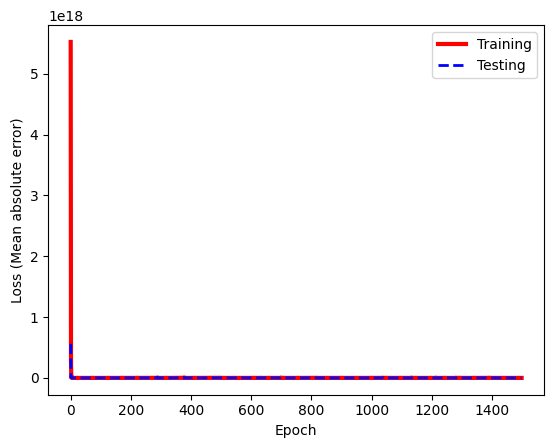

In [ ]:
plt.plot(history.history["loss"], color="r", linewidth=3)
plt.plot(history.history["val_loss"], "r--", color="b", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss (Mean absolute error)")
plt.legend(["Training", "Testing"], loc="upper right")

In [ ]:
Fy = [0.5, 1, 2, 4, 8]
for Y in Fy:
  prediction = model.predict(np.array([[40, Y]]))
  prediction = prediction[0]
  prediction = prediction[0]
  if prediction <= 0.00001:
    print("The dynamic modulus at a temperature of 40°C and a frequency of " + str(Y) + "Hz is extremely close to zero")
  else:
    prediction = round(prediction*1000, 1)
    print("The dynamic modulus at a temperature of 40°C and a frequency of " + str(Y) + "Hz is " + str(prediction) + "MPa")

1/1 [==============================] - 0s 67ms/step
The dynamic modulus at a temperature of 40°C and a frequency of 0.5Hz is 1410.0MPa
1/1 [==============================] - 0s 69ms/step
The dynamic modulus at a temperature of 40°C and a frequency of 1Hz is 1863.1MPa
1/1 [==============================] - 0s 23ms/step
The dynamic modulus at a temperature of 40°C and a frequency of 2Hz is 2786.7MPa
1/1 [==============================] - 0s 22ms/step
The dynamic modulus at a temperature of 40°C and a frequency of 4Hz is 4599.5MPa
1/1 [==============================] - 0s 32ms/step
The dynamic modulus at a temperature of 40°C and a frequency of 8Hz is 8196.3MPa
